[View in Colaboratory](https://colab.research.google.com/github/KrisSandy/MachineLearning/blob/master/ML_Classification.ipynb)

# Machine Learning | Classification

For this assignment I have choosen scikit-learn library which is an open source package developed in python. scikit-learn along with other scientific packages in python provides powerful data structures and machine learning features which can be leveraged with ease.

Besides readily available implementation of K nearest Neighbours algorithm, below are some of the main reasons for choosing scikit-learn


1.   scikit-learn is open source package
2.   Its regularly updated with more than 1 release per year which means the packages are up to date.
3. Easy to use 
4. It has implementations for most of the machine learning tasks such as Clustering, Classification, Regression etc.
5. Very good and up to date documentation available.

scikit-learn offers below features:


1.   Preprocessing - to transform, extract features and normalize the data
2.   Functions to perform Classification, Regression, Clustering 
3. Dimensionality reduction 
4. Model Selection






*Reference: https://www.oreilly.com/ideas/six-reasons-why-i-recommend-scikit-learn*

*Reference: http://scikit-learn.org/stable/index.html*

### Connecting with Google Drive

Configuring Google Drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


Verify google drive connection

### Importing Libraries

In [0]:
import pandas as pd
import numpy

### Data preprocessing

* Data in the dataset is seperated by tab. Each row represents an attribute and columns represent each individual patients. 

* In order to load the data into pandas dataframe, the file should be read using read_csv and use the seperator as tab ('\t'). A transpose of the dataframe is required to bring the data into traditional format i.e. features in columns and observations (patients) in rows. 

* After getting the data in desired format, column names are added to give more sense and completeness to the dataframe.

* Data and Response used to train and test the models should be in numbers as numpy arrays. So Autoimmune_Disease column needs to be coverted to 0 and 1 representing negative and positive respectively. 

In [4]:
fields = ['Age', 'Blood_Pressure', 'BMI', 'Plasma_level', 'Autoimmune_Disease', 'Adverse_events', 'Drug_in_serum', 'Liver_function', 'Activity_test', 'Secondary_test']
autoimmune_data = pd.read_csv(r'/content/gdrive/My Drive/GYE06/CT475_ML/autoimmune.txt',
                 sep='\t',
                 header=None
                )
autoimmune_data = autoimmune_data.transpose()
autoimmune_data.columns = fields
autoimmune_data['Autoimmune_Disease'] = autoimmune_data['Autoimmune_Disease'].map({'negative':0, 'positive':1})
autoimmune_data

,Age,Blood_Pressure,BMI,Plasma_level,Autoimmune_Disease,Adverse_events,Drug_in_serum,Liver_function,Activity_test,Secondary_test
0,30,64,35.1,61,1,1,156,0.692,32,12.7
1,22,74,30,40,0,1,60,0.527,11,0
2,21,70,30.8,50,0,0,50,0.597,26,22.6
3,23,64,34.9,59.5,0,0,92,0.725,18,1.8
4,25,76,53.2,81,1,0,100,0.759,56,3.6
5,25,62,25.1,45,0,1,59,1.268,18,16.8
6,35,84,35,68,1,5,88,0.286,41,34.1
7,22,78,34.6,43.5,0,1,32,0.101,27,31.4
8,23,68,29.7,37,0,3,45,0.293,28,1.8
9,23,86,45.5,51,1,2,120,0.127,36,30.6


In [5]:
autoimmune_data.shape

(376, 10)

### Split Train and Test

For any machine learning algorithm, the first task is to divide the data into test train dataset. This is because if we train the model using the entire dataset, the model would perform 100% accurate on the test data, but might not perform well on the new examples. Hence, we should split the data into test, train datasets and train the model using training dataset.

In [6]:
from sklearn.model_selection import train_test_split

X = autoimmune_data.drop(columns = ['Autoimmune_Disease'])
y = autoimmune_data['Autoimmune_Disease']

X_train, X_test, y_train, y_test = train_test_split(X, y)
print(X_train.shape)
print(X_test.shape)

(282, 9)
(94, 9)


### kNN (k Nearest Neighbours)

In [7]:
from sklearn.neighbors import KNeighborsClassifier

autoimmune = KNeighborsClassifier(n_neighbors=5)
autoimmune.fit(X_train, y_train)
accuracy = autoimmune.score(X_test, y_test)
print("The accuracy of the model using k=5 is {}".format(accuracy))

The accuracy of the model using k=5 is 0.7340425531914894


### 10-fold cross validation

In [8]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(autoimmune, X, y, cv=10)
print(scores)

[0.73684211 0.65789474 0.68421053 0.76315789 0.68421053 0.73684211
 0.76315789 0.78947368 0.72222222 0.75      ]


In [9]:
print("Mean of 10-fold cross validation scores : {}".format(scores.mean()))

Mean of 10-fold cross validation scores : 0.7288011695906433


### Model Selection - Finding optimal values of k

In [10]:
k_range = range(1,20)
k_scores = []
for i in k_range:
  autoimmune = KNeighborsClassifier(n_neighbors=i)
  k_scores.append(cross_val_score(autoimmune, X, y, cv=10).mean())

print(k_scores)
  

[0.6861111111111111, 0.6942982456140352, 0.6916666666666667, 0.7261695906432748, 0.7288011695906433, 0.7421052631578947, 0.7501461988304092, 0.7635964912280702, 0.7529239766081871, 0.7421052631578948, 0.7554093567251462, 0.7605263157894736, 0.7605263157894736, 0.7364035087719298, 0.7549707602339181, 0.7467836257309942, 0.7549707602339182, 0.7521929824561403, 0.7548245614035088]


Plotting the scores:

Text(0,0.5,'score')

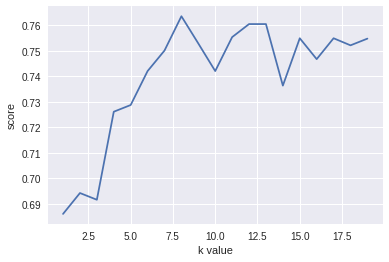

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('k value')
plt.ylabel('score')

From the above plot, the optimum value for k is 8.

In [12]:
autoimmune_knn = KNeighborsClassifier(n_neighbors=8)
accuracy_knn = cross_val_score(autoimmune_knn, X, y, cv=10).mean()
print("Accuracy using knn is {}".format(accuracy_knn))

Accuracy using knn is 0.7635964912280702


### Normalising the data

The accuracy can be increased by normalising/scaling the data.

**Scaling**:  Shifting the distribution of the data to have zero mean

**Normalizing**: Rescaling the data into the range 0 to 1.

In below example we are going to scale the data, i.e. make the mean of each column zero (or close to zero)

In [13]:
from sklearn import preprocessing

X_scaled = preprocessing.scale(X)
 
X_scaled.mean(axis=0) # axis=0 indicated that mean should be taken wrt col

array([-1.11022302e-16,  3.68499557e-16,  0.00000000e+00,  0.00000000e+00,
        7.08652994e-18,  6.37787695e-17,  9.44870659e-18,  3.77948264e-17,
       -1.32281892e-16])

Not lets train the model using the scaled data

In [14]:
autoimmune_knn = KNeighborsClassifier(n_neighbors=8)
accuracy_knn = cross_val_score(autoimmune_knn, X_scaled, y, cv=10).mean()
print("Accuracy using knn is {}".format(accuracy_knn))

Accuracy using knn is 0.7634502923976608


Now lets do the 10 fold cross validation on the normalised data. Instead of repeating the above loop for normalised data we will use GridSearchCV.

### GridSearchCV

All the above tasks of running a with a range of k values and each time executing a 10-fold cross validation. This loop can be replace with GridSearchCV, which will do all the tasks in one statement.

In [0]:
from sklearn.model_selection import GridSearchCV

In [50]:
parm_grid = dict(n_neighbors=range(1, 20))
print(parm_grid)

{'n_neighbors': range(1, 20)}


Below GridSearchCV to execute the 10 fold cross validation for each value of k and fits the model with optimum k value.

In [51]:
autoimmune_knn_scaled = GridSearchCV(autoimmune_knn, parm_grid, cv=10)
autoimmune_knn_scaled.fit(X_scaled, y)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=8, p=2,
           weights='uniform'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'n_neighbors': range(1, 20)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring=None, verbose=0)

In [63]:
print("Mean Scores")
print(autoimmune_knn_scaled.cv_results_['mean_test_score'])
print("\nStd deviation for each score")
print(autoimmune_knn_scaled.cv_results_['std_test_score'])

Mean Scores
[0.69946809 0.73404255 0.76329787 0.75531915 0.77393617 0.76595745
 0.76595745 0.76329787 0.75797872 0.73670213 0.75       0.74734043
 0.75       0.75531915 0.75797872 0.75797872 0.75797872 0.76329787
 0.76861702]

Std deviation for each score
[0.07939772 0.0645169  0.05071658 0.0589824  0.0473515  0.06529568
 0.07559001 0.0748407  0.07450501 0.06015077 0.06160315 0.04501655
 0.04678776 0.05377541 0.05267613 0.06193764 0.05652174 0.05071658
 0.06566239]


In [67]:
print("Best Score for normalised data : {} for {}".format(autoimmune_knn_scaled.best_score_, autoimmune_knn_scaled.best_params_))

Best Score for normalised data : 0.773936170212766 for {'n_neighbors': 5}


In [66]:
autoimmune_knn_raw = GridSearchCV(autoimmune_knn, parm_grid, cv=10)
autoimmune_knn_raw.fit(X, y)
print("Mean Scores")
print(autoimmune_knn_raw.cv_results_['mean_test_score'])
print("\nStd deviation for each score")
print(autoimmune_knn_raw.cv_results_['std_test_score'])

Mean Scores
[0.68617021 0.69414894 0.69148936 0.72606383 0.7287234  0.74202128
 0.75       0.76329787 0.75265957 0.74202128 0.75531915 0.7606383
 0.7606383  0.73670213 0.75531915 0.74734043 0.75531915 0.75265957
 0.75531915]

Std deviation for each score
[0.07074504 0.0535229  0.06917107 0.05215766 0.03976016 0.03469748
 0.03477429 0.04503125 0.03752673 0.05095012 0.04172371 0.0378729
 0.0521295  0.06448708 0.05409981 0.06716467 0.06250306 0.05368341
 0.06419102]


In [69]:
print("Best Score for normalised data : {} for {}".format(autoimmune_knn_raw.best_score_, autoimmune_knn_raw.best_params_))

Best Score for normalised data : 0.7632978723404256 for {'n_neighbors': 8}


After applying various tunings to the model, an accuracy of 77.3 has been achieved with k=5 and normalizing the data.

### Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression
autoimmune_log_reg = LogisticRegression()
accuracy_log_reg = cross_val_score(autoimmune_log_reg, X, y, cv=10).mean()
print("Accuracy using Logistic Regression is {}".format(accuracy_log_reg))

Accuracy using Logistic Regression is 0.7818713450292398


From the above models, there is no signicant difference in accuracy between Logistic Regression and kNN, but Logistic Regression seems to perform better than kNN.